# Example 5: Implementation of Gaia errors

In [14]:
import numpy as np
import AsgaiaTools
import matplotlib.pyplot as plt

In [15]:
# Name of the file of the particles
filename = 'Particle_list.dat';

In [16]:
# Read the file
A = np.genfromtxt(filename, comments='#',names=True);

In [17]:
#Extract the data
lon = A['lon_rad'];
lat = A['lat_rad'];
dkpc = A['dist_kpc'];
metZ = A['met_Z'];
logAge = A['logAge_yrs'];
mass = A['mass_Msun'];
del(A);

Now we calculate the "mean parallax error" (sigma_pi), the number of observed stars (Nobstars) and the extinction in the visual band (A_V)

In [18]:
[sigma_pi, Nobstars, A_V] = AsgaiaTools.GetSigmaPiGaia(lon,lat,dkpc,metZ,logAge,mass);

In [19]:
print 'Total observed stars: %.2fx10^6'%(Nobstars.sum()*1e-6);

Total observed stars: 1.83x10^6


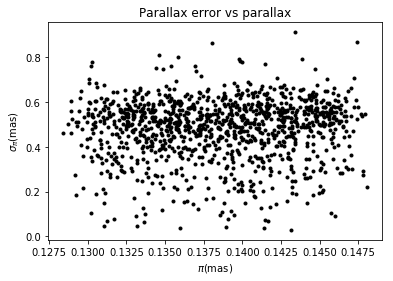

In [22]:
plt.figure('Parallax error vs parallax');
plt.plot(1/dkpc[Nobstars>0], sigma_pi[Nobstars>0],'k.');
plt.xlabel('$\pi$(mas)');
plt.ylabel('$\sigma_\pi$(mas)');
plt.title('Parallax error vs parallax');
plt.show();

In [8]:
# Conversion to cartesian coordinates:
X = -dkpc*np.cos(lat)*np.sin(lon);
Y = dkpc*np.cos(lat)*np.cos(lon)-8.0;
Z = dkpc*np.sin(lat)+0.025;

## 5.1 Spatial distribution of parallax errors

In this section we will study the spatial distribution of the mean parallax error of the particles. Each particle represents a stellar population, in which different stars have different parallax errors due to the Gaia detection. The "mean parallax error" or simply the "parallax error" of a particle refers to the mean value of the parallax error of the stellar population contained.

We model the selection function of Gaia by imposing $3<=G<20$, where G is the aparent magnitude in the G-band.

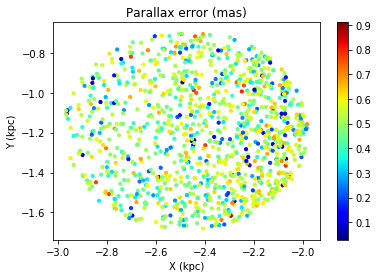

In [23]:
plt.figure();
plt.scatter(X[Nobstars>0],Y[Nobstars>0],c = sigma_pi[Nobstars>0], s = 10);
plt.xlabel('X (kpc)');
plt.ylabel('Y (kpc)');
plt.title('Parallax error (mas)');
plt.set_cmap('jet');
plt.colorbar();
plt.show();

## 5.2 Spatial distribution of stars

Due to the selection function of Gaia, the differences in extinction and distance, and the mass of the particles, the number of stars provided by each particle differs. In the next figure, we represent the contribution in stars of the particles.

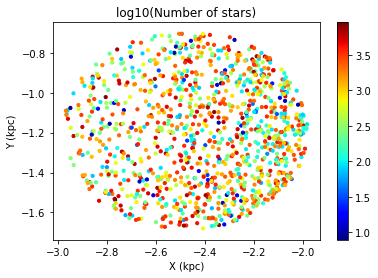

In [24]:
plt.figure();
plt.scatter(X[Nobstars>0],Y[Nobstars>0],c = np.log10(Nobstars[Nobstars>0]), s = 10);
plt.xlabel('X (kpc)');
plt.ylabel('Y (kpc)');
plt.title('log10(Number of stars)');
plt.set_cmap('jet');
plt.colorbar();
plt.show();

Next test: what would happen if all the particles had the same mass?

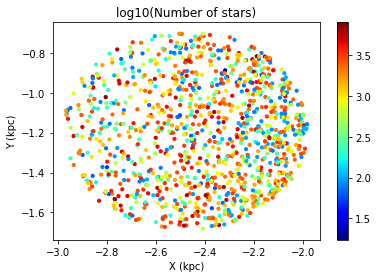

The total number of stars is: 1.80 x10^6


In [25]:
# Redefine the masses:
mass = 0.*mass + np.mean(mass);
# Recalculate the number of stars:
Nobstars = AsgaiaTools.GetSigmaPiGaia(lon,lat,dkpc,metZ,logAge,mass)[1];# Now only the second output is required
# Repeat the plot:
plt.figure();
plt.scatter(X[Nobstars>0],Y[Nobstars>0],c = np.log10(Nobstars[Nobstars>0]), s = 10);
plt.xlabel('X (kpc)');
plt.ylabel('Y (kpc)');
plt.title('log10(Number of stars)');
plt.set_cmap('jet');
plt.colorbar();
plt.show();
print('The total number of stars is: %.2f x10^6'%(np.sum(Nobstars)*1e-6))

## 5.3 Distribution of parallax errors for all the stars

In [26]:
[Sigma_pi, Sigma_pi2, nobstars, A_V, sigmapi_hist] = AsgaiaTools.GetSigmaPiDistr(lon, lat, dkpc, metZ, logAge, mass, IMF_type='s', normalize = False, histo_limits = [0.,1.], Nbins = 100);

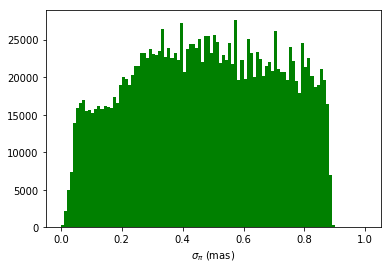

In [27]:
plt.figure('sigma_pi distribution');
histogram_axis = np.linspace(0,1,len(sigmapi_hist)+1)[0:-1]
width = histogram_axis[1]-histogram_axis[0];
plt.bar(histogram_axis, sigmapi_hist,fc='g', align='edge',width=width);
plt.xlabel(r'$\sigma_\pi$ (mas)')
plt.show()